Google play store apps analysis
1. Will find trends
2. highest rated
3. highest installed
4. most liked categories

Then we will do NLP of the user reviews and create  a NN for the same

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('googleplaystore.csv')

In [5]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [6]:
data.shape

(10841, 13)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [9]:
data.isnull().sum()

,0
App,0
Category,0
Rating,1474
Reviews,0
Size,0
Installs,0
Type,1
Price,0
Content Rating,1
Genres,0


In [10]:
data = data.dropna()

In [11]:
#edit column data of Install to remove '+'
data['Installs'] = data['Installs'].str.replace('+', '')
data['Installs'] = data['Installs'].str.replace(',', '')
data['Installs'] = data['Installs'].str.replace('Free', '0')
data['Installs'] = data['Installs'].astype(int)

<ipython-input-11-e431d0e1f308>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Installs'] = data['Installs'].str.replace('+', '')
<ipython-input-11-e431d0e1f308>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Installs'] = data['Installs'].str.replace(',', '')
<ipython-input-11-e431d0e1f308>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

In [12]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [13]:
import math
import seaborn as sns

Text(0.5, 1.0, 'No. of apps installed for each category')

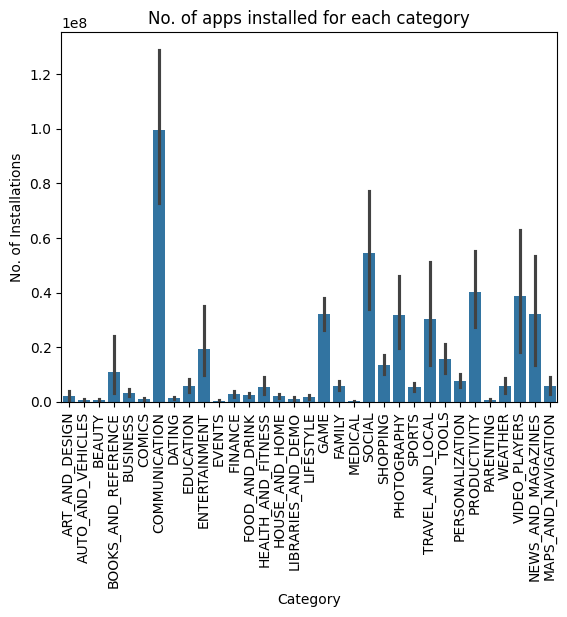

In [14]:
sns.barplot(data, x='Category', y='Installs')
plt.xticks(rotation=90)
plt.xlabel('Category')
plt.ylabel('No. of Installations')
plt.title('No. of apps installed for each category')

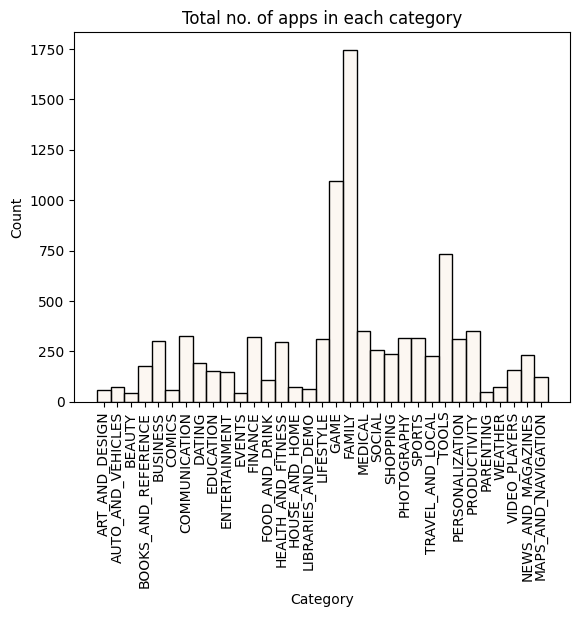

In [15]:
sns.histplot(data['Category'], alpha=0.5, color='linen')
plt.title('Total no. of apps in each category')
plt.xticks(rotation=90)
plt.show()

In [16]:
app_aggregated = data.groupby(by =['App'])['Rating'].mean()

In [17]:
app_aggregated.sort_values(ascending=False).head(10)

,Rating
App,
BP Log lite,5.0
CQ ESPM,5.0
BC MVA Fines,5.0
CP Installer App,5.0
COMSATS BOOK STORE FOR BS(CS),5.0
Mindvalley U Tallinn 2018,5.0
CN Resident,5.0
Monster Ride Pro,5.0
Morse Player,5.0


In [18]:
category_aggregated = data.groupby(by =['Category', 'App'])['Rating'].mean()

In [19]:
category_aggregated.LIFESTYLE.sort_values(ascending=False).head(5)

,Rating
App,
Helping BD,5.0
EU Exit poll,5.0
Barbers.BH,5.0
South Florida AA Meetings,5.0
"Beacon Baptist Jupiter, FL",5.0


In [20]:
category_aggregated.GAME.sort_values(ascending=False).head(5)

,Rating
App,
Brick Breaker BR,5.0
Mad Dash Fo' Cash,5.0
EC Mover,5.0
Trovami se ci riesci,5.0
Flippy Axe : Flip The Knife & Axe Simulator,5.0


<Axes: xlabel='Rating', ylabel='Installs'>

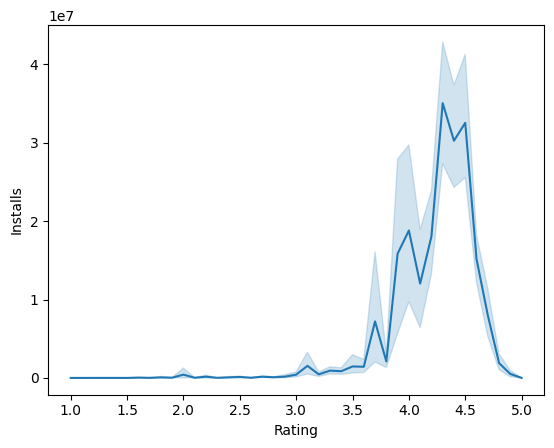

In [21]:
sns.lineplot(x=data['Rating'], y=data['Installs'])

In [22]:
#Top 10 most installed apps
data.sort_values(by='Installs', ascending=False).head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
451,Gmail,COMMUNICATION,4.3,4604483,Varies with device,1000000000,Free,0,Everyone,Communication,"August 2, 2018",Varies with device,Varies with device
3665,YouTube,VIDEO_PLAYERS,4.3,25655305,Varies with device,1000000000,Free,0,Teen,Video Players & Editors,"August 2, 2018",Varies with device,Varies with device
382,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56646578,Varies with device,1000000000,Free,0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
386,Hangouts,COMMUNICATION,4.0,3419433,Varies with device,1000000000,Free,0,Everyone,Communication,"July 21, 2018",Varies with device,Varies with device
391,Skype - free IM & video calls,COMMUNICATION,4.1,10484169,Varies with device,1000000000,Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
3687,Google Play Movies & TV,VIDEO_PLAYERS,3.7,906384,Varies with device,1000000000,Free,0,Teen,Video Players & Editors,"August 6, 2018",Varies with device,Varies with device
411,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9643041,Varies with device,1000000000,Free,0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
3736,Google News,NEWS_AND_MAGAZINES,3.9,877635,13M,1000000000,Free,0,Teen,News & Magazines,"August 1, 2018",5.2.0,4.4 and up
3765,Google News,NEWS_AND_MAGAZINES,3.9,877635,13M,1000000000,Free,0,Teen,News & Magazines,"August 1, 2018",5.2.0,4.4 and up
865,Google Play Games,ENTERTAINMENT,4.3,7165362,Varies with device,1000000000,Free,0,Teen,Entertainment,"July 16, 2018",Varies with device,Varies with device


In [23]:
#Best rated apps in each category
data_aggregated = data[data['Rating'] ==5].groupby(['Category'])['App'].count()

Text(0, 0.5, 'No. of 5 star Apps')

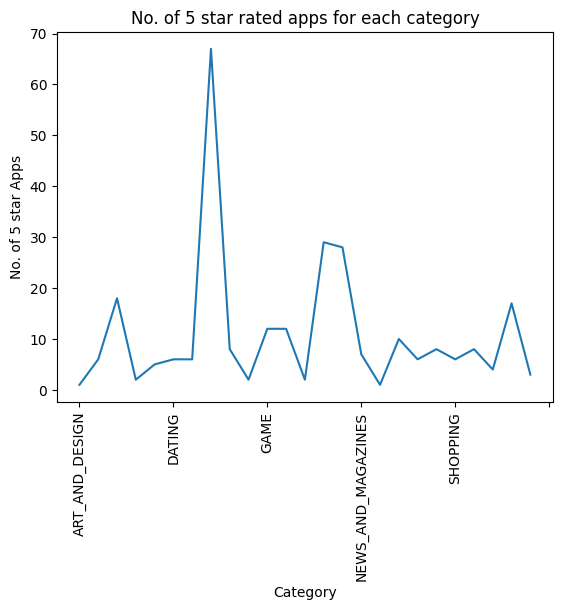

In [24]:
data_aggregated.plot()
plt.title('No. of 5 star rated apps for each category')
plt.xticks(rotation=90)
plt.xlabel('Category')
plt.ylabel('No. of 5 star Apps')

In [25]:
#Let us create an NLP model to train the google reviews dataset
df = pd.read_csv('googleplaystore_user_reviews.csv')

In [26]:
df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [27]:
df['Sentiment'].unique()

array(['Positive', nan, 'Neutral', 'Negative'], dtype=object)

In [28]:
df.sample(20)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
19890,CDL Practice Test 2018 Edition,Amazing app! I used & obtain cdl permit. No gi...,Positive,0.3750,0.700000
37643,Duolingo: Learn Languages Free,It's lot fun. I love set up. The add free vers...,Positive,0.3750,0.425000
38932,Easy Recipes,Very good cooking recipes I love thank,Positive,0.7050,0.690000
63635,Hot Wheels: Race Off,NaN,NaN,NaN,NaN
15153,"Black Wallpaper, AMOLED, Dark Background: Darkify",NaN,NaN,NaN,NaN
57833,Grubhub: Food Delivery,"Much worse Foodler app, bought company I choice.",Negative,-0.4000,0.600000
9506,AutoCAD - DWG Viewer & Editor,I paid monthly subscription unfortunately feat...,Negative,-0.5000,1.000000
63927,HotelTonight: Book amazing deals at great hotels,"Waited day book, everything got twice expensiv...",Negative,-0.5000,0.700000
15660,Blidz - Hunt Free Deals On Trending Items!,NaN,NaN,NaN,NaN
61245,Hello Stars,NaN,NaN,NaN,NaN


Looking at the data we can conclude that the Sentiment is

Positive if Sentiment_Polarity >0,
Neutral if Sentiment_Polarity = 0
Negative if Sentiment_Polarity <0

In [29]:
df.dropna(inplace=True)

In [30]:
df.shape

(37427, 5)

In [31]:
df = df.drop(columns = ['App','Sentiment_Polarity','Sentiment_Subjectivity'])

In [32]:
df.head()

,Translated_Review,Sentiment
0,I like eat delicious food. That's I'm cooking ...,Positive
1,This help eating healthy exercise regular basis,Positive
3,Works great especially going grocery store,Positive
4,Best idea us,Positive
5,Best way,Positive


In [33]:
#Let's apply NLP
#Data Cleaning

from nltk import PorterStemmer
from nltk.corpus import stopwords
import nltk
import re

In [34]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [35]:
stemmer = PorterStemmer()
corpus = []
sentences = df['Translated_Review']
i = 0
for review in sentences:
    temp_sen = re.sub('[^a-zA-Z]', ' ', review)
    temp_sen = temp_sen.lower()
    words = temp_sen.split()
    print('-------', i, '----------')
    i=i+1
    print(words)
    words = [stemmer.stem(word) for word in words if word not in stopwords.words('english')]
    words = ' '.join(words)
    print(words)
    corpus.append(words)

Streaming output truncated to the last 5000 lines.
['i', 'got', 'much', 'expectations', 'before', 'imagination']
got much expect imagin
------- 35761 ----------
['i', 'would', 'give', 'everything', 'i', 'have', 'because', 'really', 'made', 'comfortable']
would give everyth realli made comfort
------- 35762 ----------
['so', 'far', 'works', 'smoothly', 'as', 'promised', 'can', 'complain', 'anything']
far work smoothli promis complain anyth
------- 35763 ----------
['great', 'dating', 'app', 'i', 'found', 'match', 'here', 'this', 'amazing', 'me']
great date app found match amaz
------- 35764 ----------
['great', 'std', 'sti', 'dating', 'everything', 'group', 'people', 'need']
great std sti date everyth group peopl need
------- 35765 ----------
['herpes', 'gaves', 'instant', 'access', 'great', 'features', 'this', 'message', 'system', 'well']
herp gave instant access great featur messag system well
------- 35766 ----------
['works', 'good', 'far', 'wish', 'i', 'could', 'find', 'free', 'dat

In [36]:
corpus

['like eat delici food cook food case best food help lot also best shelf life',
 'help eat healthi exercis regular basi',
 'work great especi go groceri store',
 'best idea us',
 'best way',
 'amaz',
 'look forward app',
 'help site help food get',
 'good',
 'use inform amount spell error question valid inform share fix star given',
 'thank great app add arthriti eye immun kidney liver detox food pleas',
 'greatest ever complet awesom maintain health must ppl love',
 'good health good health first prioriti',
 'health import world either life think',
 'mr sunita bhati thank develop make kind app realli good healthi food bodi',
 'use diabet age need control sugar thank',
 'one greatest app',
 'good nice',
 'healthi realli help',
 'god health',
 'health alway top prioriti mysg',
 'excel use',
 'found lot wealth form health',
 'found import',
 'healthi eat',
 'good simpli good',
 'test',
 'good',
 'thank advic download adob reader still get recip book',
 'recip book unabl recip book',
 'ab

In [37]:
from sklearn.preprocessing import LabelEncoder

In [38]:
y_labels = LabelEncoder().fit_transform(df['Sentiment'])

In [39]:
y_labels

array([2, 2, 2, ..., 0, 2, 0])

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X = corpus
Y = y_labels

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [44]:
vectorizer = TfidfVectorizer()
X_new = vectorizer.fit_transform(X)

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X_new, Y)

In [46]:
X_train.shape

(28070, 13546)

In [47]:
y_train.shape

(28070,)

In [48]:
from sklearn.naive_bayes import MultinomialNB

In [49]:
nb_model = MultinomialNB()

In [50]:
nb_model.fit(X_train, y_train)

MultinomialNB()

In [51]:
X_test.shape

(9357, 13546)

In [56]:
y_pred=nb_model.predict(X_test)

NameError: name 'metrics' is not defined

In [57]:
from sklearn import metrics

In [58]:
metrics.accuracy_score(y_test, y_pred)

0.7123009511595597

In [59]:
from sklearn.ensemble import RandomForestClassifier

In [60]:
rfc = RandomForestClassifier()

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X_new, Y)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [62]:
y_pred = rfc.predict(X_test)

In [63]:
metrics.accuracy_score(y_test, y_pred)

0.8879982900502298